## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7
#### Регрессия
### Дисциплина: Интеллектуальный анализ данных

##### Студент: Фаик Карим Яссерович
##### Группа: НФИбд-02-21

***

### Вариант №_17

Japanese Credit Screening Data Set  

Название файла: crx.data 

Ссылка: https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/  

Класс: A16 (столбец No 16) 

Зависимая переменная: A8 (столбец No 8)  

Метод обработки пропущенных значений – медиана класса 

Метод обработки выбросов – стандартизованная оценка (Z-score) 

Метод снижения размерности данных – одномерный отбор признаков (SelectKBest) 

Регрессоры: 

Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5 

регрессия эластичная сеть (ElasticNet), параметры alpha в диапазоне от 0.5 до 1.5, l1_ratio от 0.5 до 1.5   

регрессии на основе метода ближайших соседей (KNeighborsRegressor), параметр n_neighbors в диапазоне от 1 до 5 

Показатели качества регрессии: 

Для определения лучшего регрессора MSPE 

Для визуализации кривой обучения MAE 

# 1.Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной). 

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'

column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df = pd.read_csv(url, header=None, names=column_names, na_values='?')

print(df.head())

  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0   +


In [3]:
print(df.dtypes)

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object


# 2.Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки.  

In [4]:
for col in ['A2', 'A3', 'A8', 'A11', 'A14']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
df_cleaned = df.dropna(subset=['A8', 'A16'])
df_numeric = df_cleaned.select_dtypes(include=[np.number])

In [6]:
print("Числовые признаки после удаления записей с пропущенными значениями:")
print(df_numeric.head())
print("Размер набора данных после обработки:", df_numeric.shape)

Числовые признаки после удаления записей с пропущенными значениями:
      A2     A3    A8  A11    A14  A15
0  30.83  0.000  1.25    1  202.0    0
1  58.67  4.460  3.04    6   43.0  560
2  24.50  0.500  1.50    0  280.0  824
3  27.83  1.540  3.75    5  100.0    3
4  20.17  5.625  1.71    0  120.0    0
Размер набора данных после обработки: (690, 6)


# 3.Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных.  

In [7]:
from scipy import stats
df_filled = df_cleaned.copy()

for col in df_numeric.columns:
    df_filled[col] = df_cleaned.groupby('A16')[col].transform(lambda x: x.fillna(x.median()))

print("Данные после замены пропущенных значений медианой:")
print(df_filled.head())

Данные после замены пропущенных значений медианой:
  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0   +


In [8]:
z_scores = np.abs(stats.zscore(df_filled.select_dtypes(include=[np.number])))

df_no_outliers = df_filled[(z_scores < 3).all(axis=1)]

print("\nРазмер набора данных после удаления выбросов:", df_no_outliers.shape)
print("Данные после удаления выбросов:")
print(df_no_outliers.head())


Размер набора данных после удаления выбросов: (638, 16)
Данные после удаления выбросов:
  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0   +


# 4.Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений.  

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [10]:
X = df_no_outliers.drop(['A16', 'A8'], axis=1)
y = df_no_outliers['A8']
X

,A1,A2,A3,A4,A5,A6,A7,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,u,g,w,v,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,t,f,0,f,s,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,f,f,0,f,g,260.0,0
686,a,22.67,0.750,u,g,c,v,f,t,2,t,g,200.0,394
687,a,25.25,13.500,y,p,ff,ff,f,t,1,t,g,200.0,1
688,b,17.92,0.205,u,g,aa,v,f,f,0,f,g,280.0,750


In [11]:
X_dummies = pd.get_dummies(X, drop_first=True)
print("\nДанные после One-Hot Encoding (преобразование категориальных признаков):")
print(X_dummies.head())


Данные после One-Hot Encoding (преобразование категориальных признаков):
      A2     A3  A11    A14  A15   A1_b  A4_u   A4_y  A5_gg   A5_p  ...  \
0  30.83  0.000    1  202.0    0   True  True  False  False  False  ...   
1  58.67  4.460    6   43.0  560  False  True  False  False  False  ...   
2  24.50  0.500    0  280.0  824  False  True  False  False  False  ...   
3  27.83  1.540    5  100.0    3   True  True  False  False  False  ...   
4  20.17  5.625    0  120.0    0   True  True  False  False  False  ...   

    A7_j   A7_n   A7_o   A7_v   A7_z  A9_t  A10_t  A12_t  A13_p  A13_s  
0  False  False  False   True  False  True   True  False  False  False  
1  False  False  False  False  False  True   True  False  False  False  
2  False  False  False  False  False  True  False  False  False  False  
3  False  False  False   True  False  True   True   True  False  False  
4  False  False  False   True  False  True  False  False  False   True  

[5 rows x 36 columns]


In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X_dummies), columns=X_dummies.columns)
print("\nДанные после масштабирования на интервал [0, 1]:")
print(X_scaled.head())


Данные после масштабирования на интервал [0, 1]:
         A2        A3     A11       A14       A15  A1_b  A4_u  A4_y  A5_gg  \
0  0.332166  0.000000  0.0625  0.297059  0.000000   1.0   1.0   0.0    0.0   
1  0.873590  0.228718  0.3750  0.063235  0.037066   0.0   1.0   0.0    0.0   
2  0.209063  0.025641  0.0000  0.411765  0.054541   0.0   1.0   0.0    0.0   
3  0.273823  0.078974  0.3125  0.147059  0.000199   1.0   1.0   0.0    0.0   
4  0.124854  0.288462  0.0000  0.176471  0.000000   1.0   1.0   0.0    0.0   

   A5_p  ...  A7_j  A7_n  A7_o  A7_v  A7_z  A9_t  A10_t  A12_t  A13_p  A13_s  
0   0.0  ...   0.0   0.0   0.0   1.0   0.0   1.0    1.0    0.0    0.0    0.0  
1   0.0  ...   0.0   0.0   0.0   0.0   0.0   1.0    1.0    0.0    0.0    0.0  
2   0.0  ...   0.0   0.0   0.0   0.0   0.0   1.0    0.0    0.0    0.0    0.0  
3   0.0  ...   0.0   0.0   0.0   1.0   0.0   1.0    1.0    1.0    0.0    0.0  
4   0.0  ...   0.0   0.0   0.0   1.0   0.0   1.0    0.0    0.0    0.0    1.0  

[5 row

In [13]:
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X_scaled, y)

selected_features = X_scaled.columns[selector.get_support()].tolist()
print("\nВыбранные три признака после применения SelectKBest:", selected_features)


Выбранные три признака после применения SelectKBest: ['A2', 'A11', 'A9_t']


In [14]:
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
print("\nДанные после отбора трех признаков:")
print(X_selected_df.head())

print("\nРазмер данных после отбора трех признаков:", X_selected_df.shape)


Данные после отбора трех признаков:
         A2     A11  A9_t
0  0.332166  0.0625   1.0
1  0.873590  0.3750   1.0
2  0.209063  0.0000   1.0
3  0.273823  0.3125   1.0
4  0.124854  0.0000   1.0

Размер данных после отбора трех признаков: (638, 3)


# 5.Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных. 

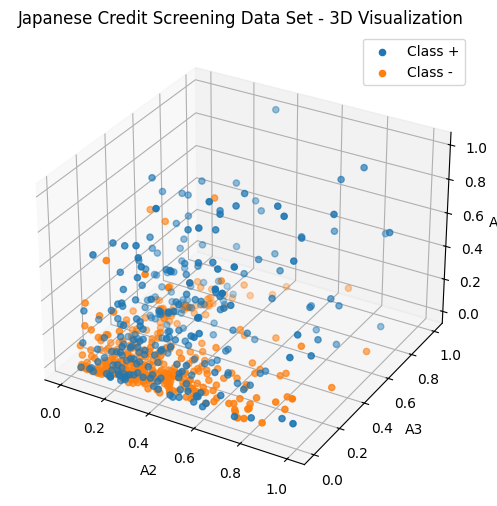

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

y_class = df_no_outliers['A16'].reset_index(drop=True) 

selected_features = X_scaled.columns[:3]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for class_label in y_class.unique():
    idx = y_class == class_label
    ax.scatter(X_scaled[selected_features[0]][idx],
               X_scaled[selected_features[1]][idx],
               X_scaled[selected_features[2]][idx],
               label=f'Class {class_label}')

ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel(selected_features[2])

ax.set_title('Japanese Credit Screening Data Set - 3D Visualization')
ax.legend()

plt.show()

# 6.Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV. 

In [16]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [17]:
y = df_no_outliers['A8']

X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [18]:
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_mse = evaluate_model(poly_model, X_poly_train, y_train, X_poly_test, y_test)
print(f"Mean Squared Error для Polynomial Regression (degree=2): {poly_mse:.4f}")

poly_features = PolynomialFeatures(degree=4)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_mse = evaluate_model(poly_model, X_poly_train, y_train, X_poly_test, y_test)
print(f"Mean Squared Error для Polynomial Regression (degree=4): {poly_mse:.4f}")

poly_features = PolynomialFeatures(degree=5)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_mse = evaluate_model(poly_model, X_poly_train, y_train, X_poly_test, y_test)
print(f"Mean Squared Error для Polynomial Regression (degree=5): {poly_mse:.4f}")

Mean Squared Error для Polynomial Regression (degree=2): 4.0311
Mean Squared Error для Polynomial Regression (degree=4): 4.0888
Mean Squared Error для Polynomial Regression (degree=5): 4.0420


In [19]:
poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_mse = evaluate_model(poly_model, X_poly_train, y_train, X_poly_test, y_test)
print(f"Mean Squared Error для Polynomial Regression (degree=3): {poly_mse:.4f}")
print(f"Лучшие параметры Polynomial Regression: (degree=3)")

Mean Squared Error для Polynomial Regression (degree=3): 3.8344
Лучшие параметры Polynomial Regression: (degree=3)


In [20]:
elastic_net = ElasticNet(max_iter=10000)
param_grid_en = {
    'alpha': np.arange(0.5, 1.6, 0.1),
    'l1_ratio': np.arange(0.0, 1.1, 0.1)
}

grid_search_en = GridSearchCV(elastic_net, param_grid_en, cv=5)
grid_search_en.fit(X_train, y_train)

best_en_model = grid_search_en.best_estimator_
en_mse = evaluate_model(best_en_model, X_train, y_train, X_test, y_test)
print(f"Mean Squared Error для ElasticNet: {en_mse:.4f}")
print(f"Лучшие параметры ElasticNet: {grid_search_en.best_params_}")

Mean Squared Error для ElasticNet: 4.8373
Лучшие параметры ElasticNet: {'alpha': 0.5, 'l1_ratio': 0.0}


In [21]:
knn_model = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': range(1, 6)
}

grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

best_knn_model = grid_search_knn.best_estimator_
knn_mse = evaluate_model(best_knn_model, X_train, y_train, X_test, y_test)
print(f"Mean Squared Error для KNeighborsRegressor: {knn_mse:.4f}")
print(f"Лучшие параметры KNeighborsRegressor: {grid_search_knn.best_params_}")


Mean Squared Error для KNeighborsRegressor: 4.6124
Лучшие параметры KNeighborsRegressor: {'n_neighbors': 4}


# 7. Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии. 

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

In [23]:
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_absolute_error',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Обучение MAE')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Тест MAE')
    plt.title(title)
    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

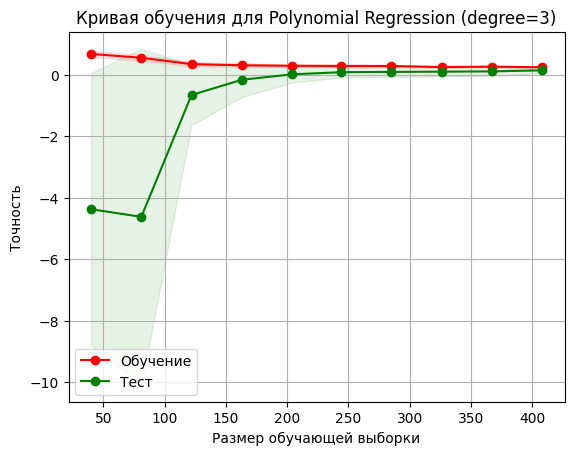

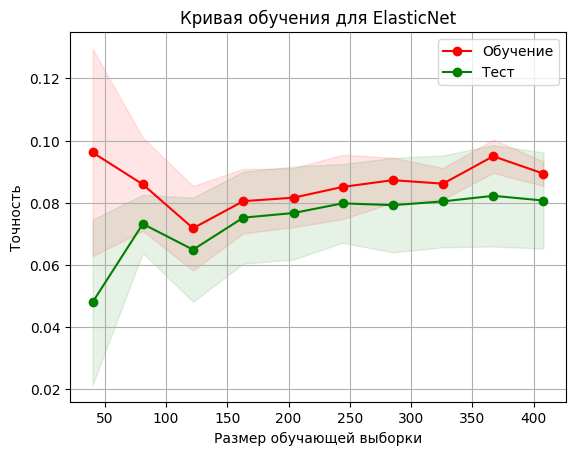

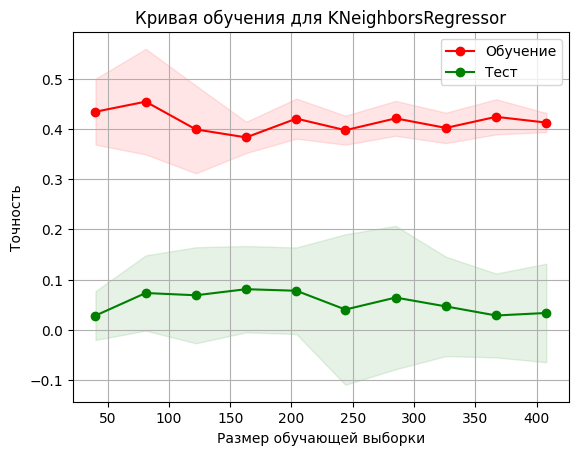

In [31]:
models = {
    'Polynomial Regression (degree=3)': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    'ElasticNet': ElasticNet(alpha=0.5, l1_ratio=0.0),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=4)
}

for model_name, model in models.items():
    plot_learning_curve(model, X_train, y_train, f'Кривая обучения для {model_name}')

# 8. Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения. 

In [25]:
degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)
best_poly_model = polyreg

In [26]:
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.0)
elastic_net.fit(X_train, y_train)
best_en_model = elastic_net

In [27]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)
best_knn_model = knn

In [28]:
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1,
                                                             train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Размер обучающей выборки")
    plt.ylabel("Точность")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - np.std(train_scores, axis=1),
                     train_scores_mean + np.std(train_scores, axis=1), alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - np.std(test_scores, axis=1),
                     test_scores_mean + np.std(test_scores, axis=1), alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Обучение")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Тест")
    plt.legend(loc="best")
    plt.show()

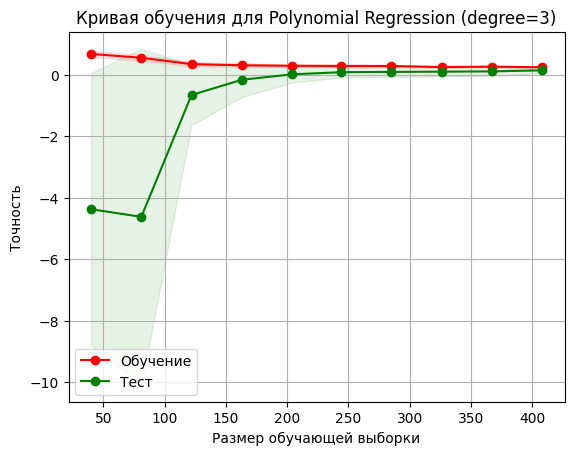

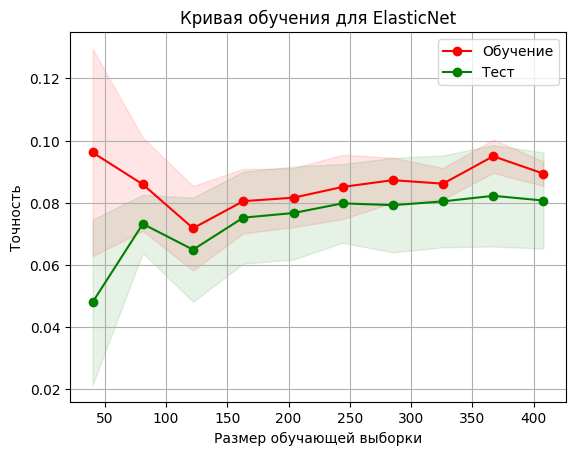

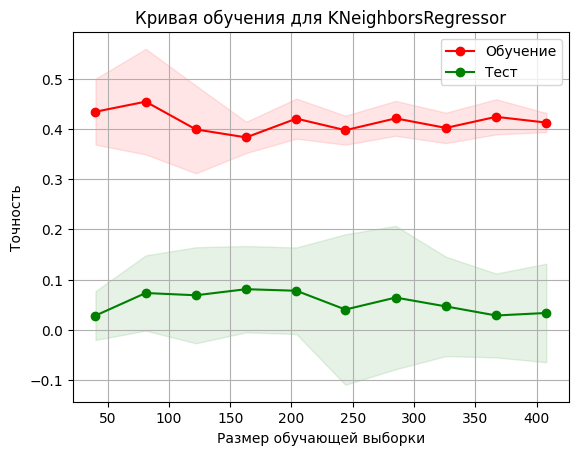

In [29]:
plot_learning_curve(best_poly_model, X_train, y_train, "Кривая обучения для Polynomial Regression (degree=3)")
plot_learning_curve(best_en_model, X_train, y_train, "Кривая обучения для ElasticNet")
plot_learning_curve(best_knn_model, X_train, y_train, "Кривая обучения для KNeighborsRegressor")

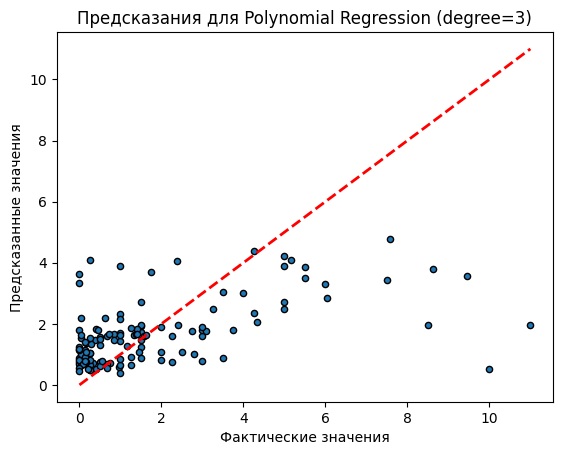

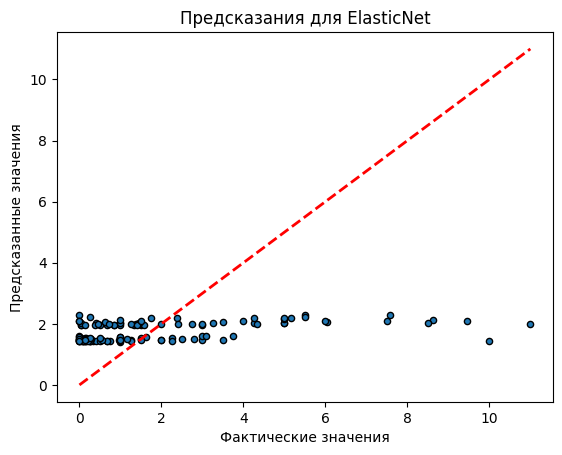

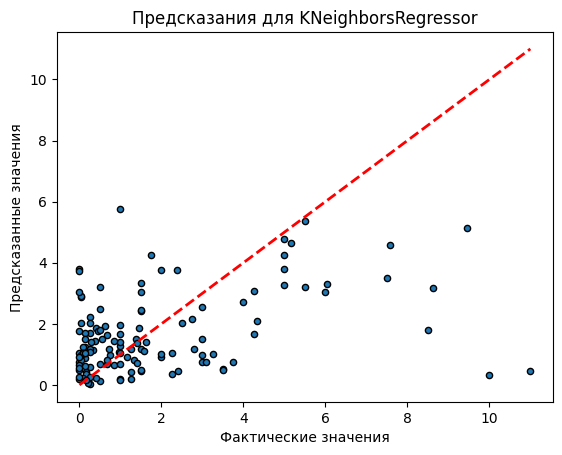

In [30]:
def plot_predictions(model, X, y, title):
    y_pred = model.predict(X)
    plt.scatter(y, y_pred, edgecolor='k', s=20)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel("Фактические значения")
    plt.ylabel("Предсказанные значения")
    plt.title(title)
    plt.show()

plot_predictions(best_poly_model, X_test, y_test, "Предсказания для Polynomial Regression (degree=3)")
plot_predictions(best_en_model, X_test, y_test, "Предсказания для ElasticNet")
plot_predictions(best_knn_model, X_test, y_test, "Предсказания для KNeighborsRegressor")